In [480]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import SGDRegressor
from collections import Counter
from scipy.optimize import minimize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.linalg import eigh as sp_eigh
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [481]:
df=pd.read_csv(r'C:\Users\yaneg\.git\py\ml\heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


EDA

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


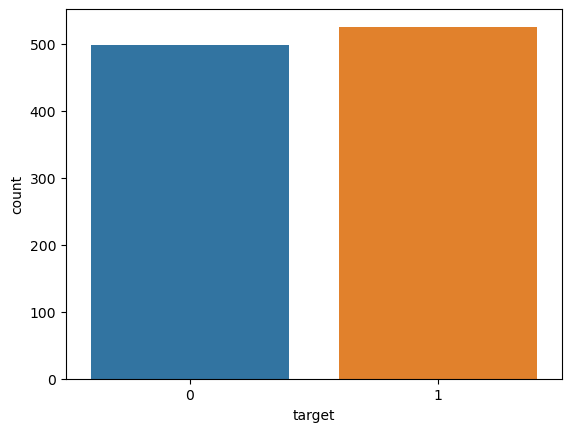

In [482]:
sns.countplot(x="target", data=df)
plt.show()

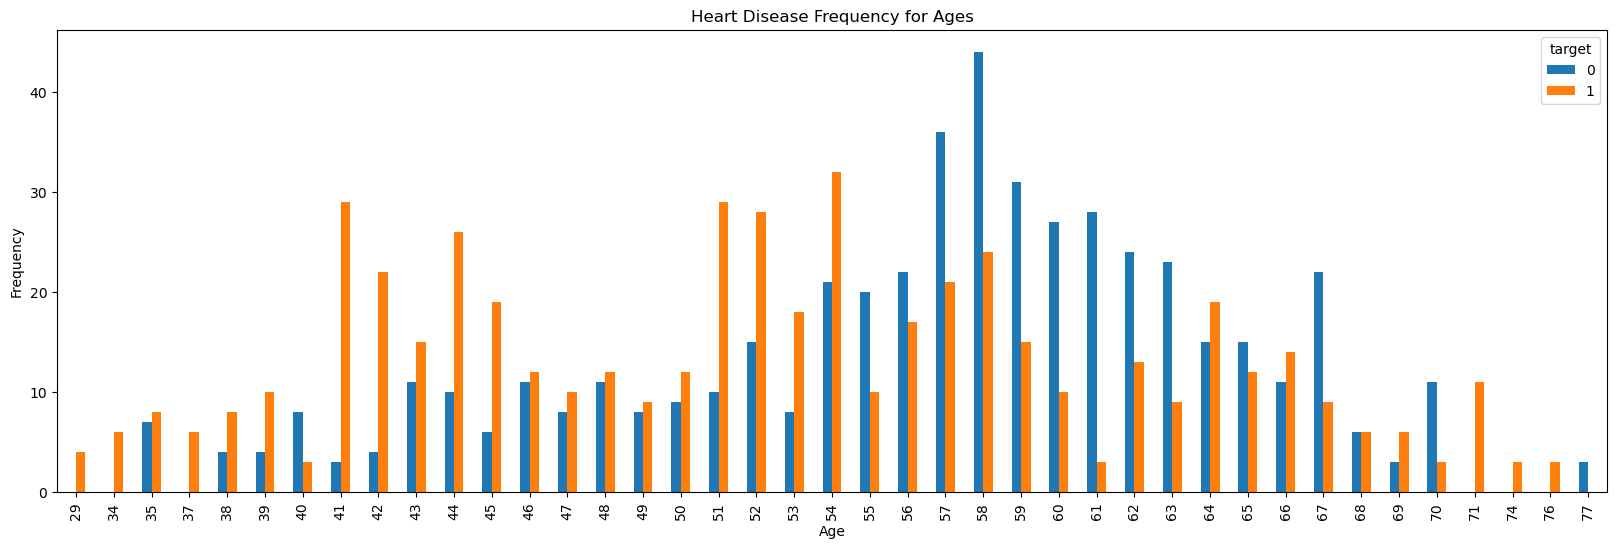

In [483]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


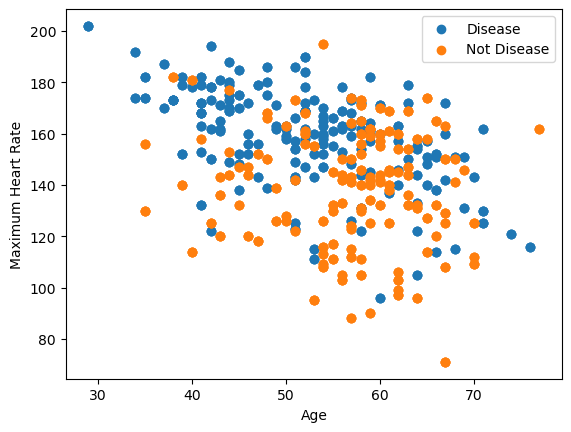

In [484]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Можно увидеть что с увеличением возраста количество заболеваний увеличивается, в то время как их отсутсвие снижается

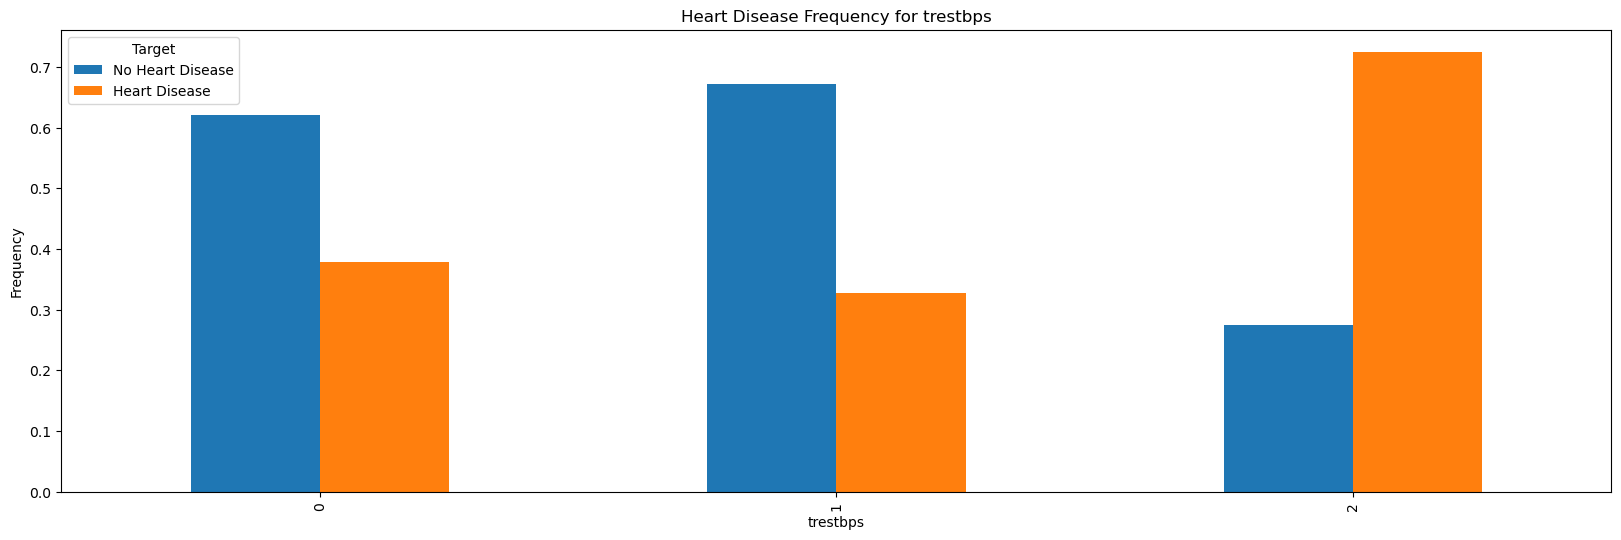

In [ ]:
ct = pd.crosstab(df.slope, df.target, normalize='index') 

# Построение столбчатой диаграммы
ct.plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for slope')
plt.xlabel('slope')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()
# для большей наглядности я построил графики, показывающие частоту 

Можно увидеть, что с увеличением показателя, частота значительно увеличивается

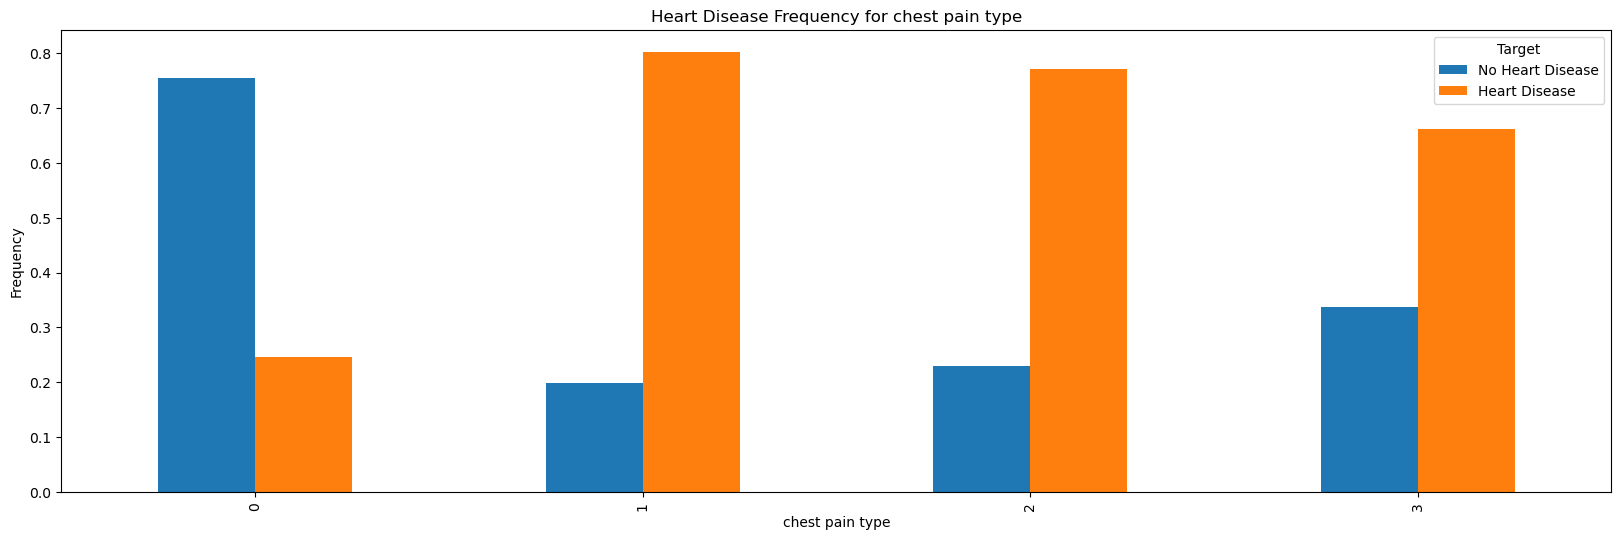

In [ ]:
ct = pd.crosstab(df.cp, df.target, normalize='index') 

# Построение столбчатой диаграммы
ct.plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

В данном случае можем увидеть, что взаимосвязь носит отнюдь нелинейный характер, частота сначала увеличивается, потом начинает снижаться нобходимо будет ввести dummy

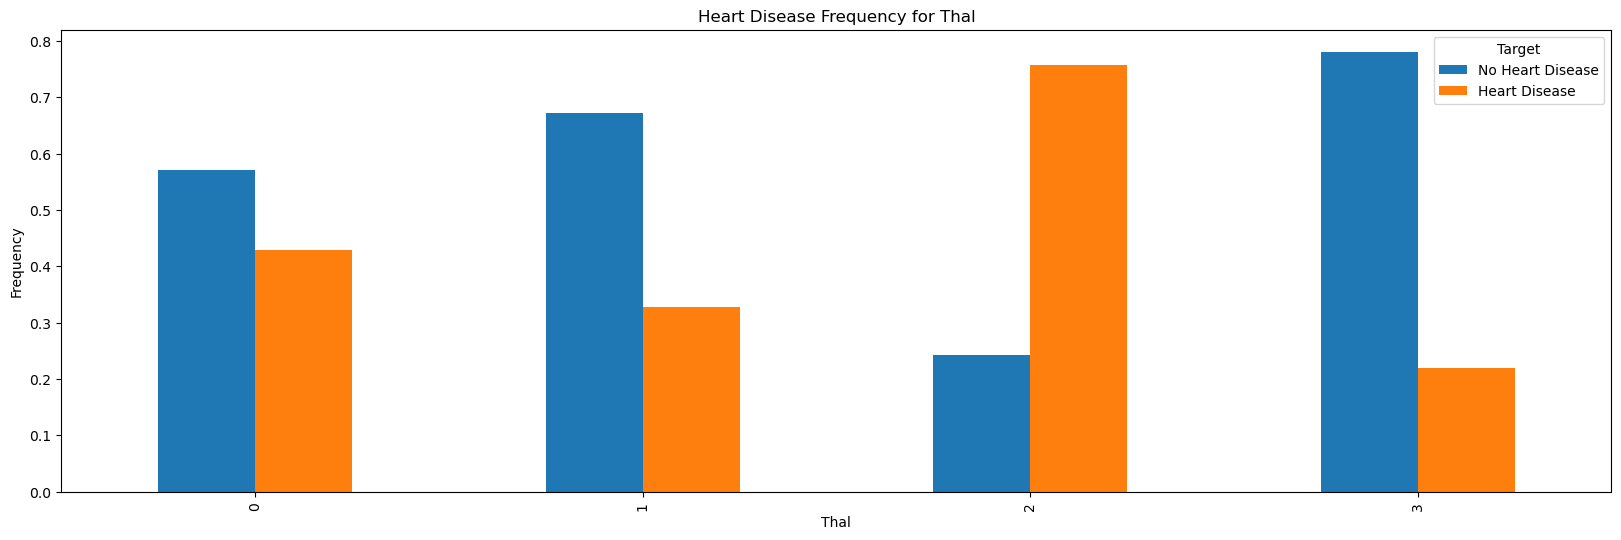

In [ ]:
ct = pd.crosstab(df.thal, df.target, normalize='index') 

# Построение столбчатой диаграммы
ct.plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for Thal')
plt.xlabel('Thal')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

Результат нельзя назвать однозначным, как таковая зависимость отсутвует

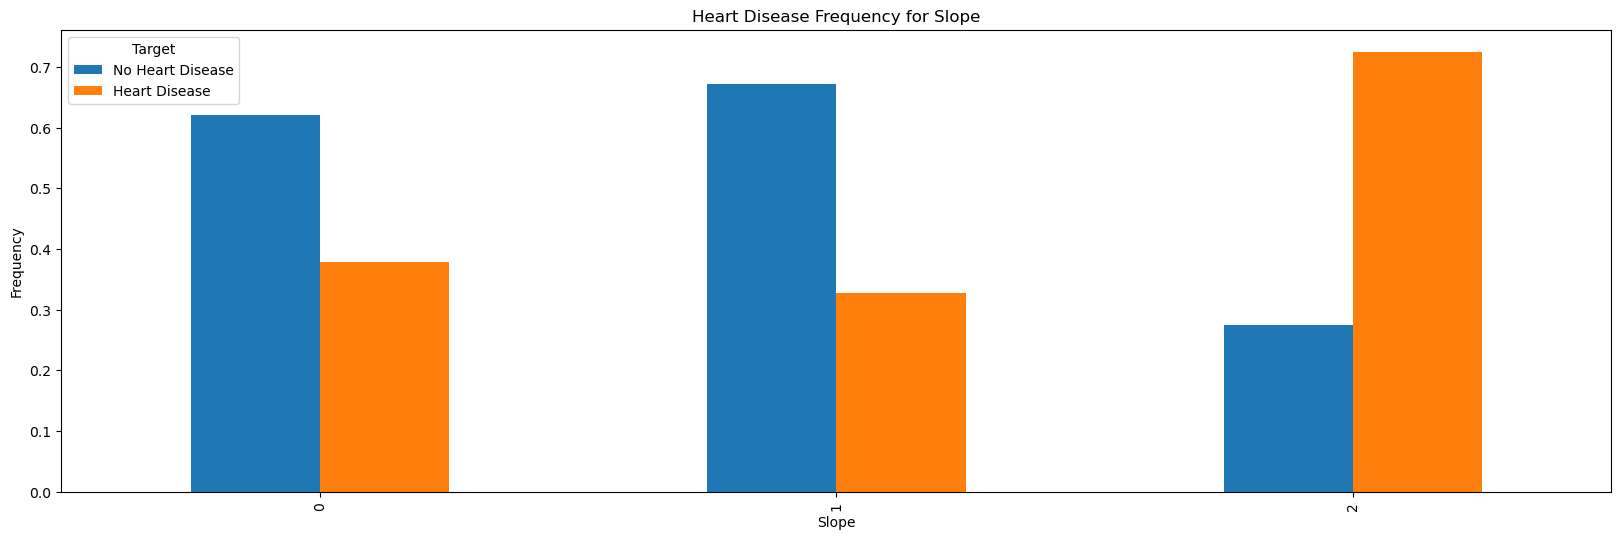

In [ ]:
ct = pd.crosstab(df.slope, df.target, normalize='index') 

# Построение столбчатой диаграммы
ct.plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

В данном случае также нельзя увидеть однозначную связь

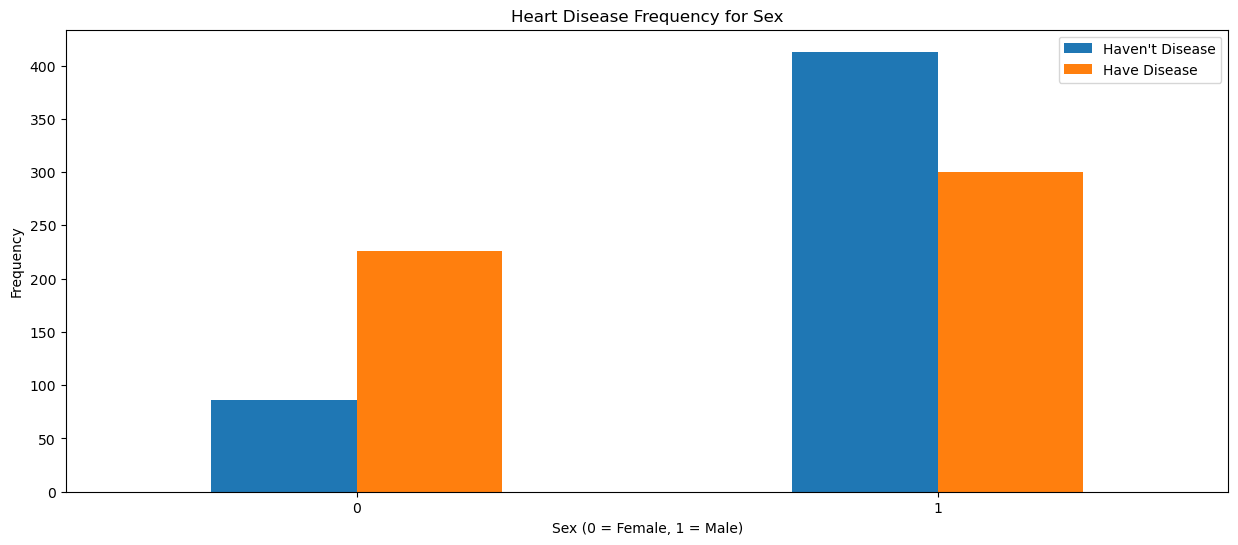

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Можно увидеть что у женщим заболевание встречается реже

FEATURE ENGINEERING

Пропущенные данные отсутсвуют
cp,thal,slope
Данные признаки необходимо перевести в количественные, поскольку нельзя сказать, что изменение числа внутри имеют однозначную связь с целевым признакам, поэтому лучше будет перевести их в дамми  

In [ ]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()
df=df.drop(columns=['cp','thal','slope'])
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,0,...,True,False,False,False,False,True,False,False,False,True
1021,60,1,125,258,0,0,141,1,2.8,1,...,False,False,False,False,False,False,True,False,True,False
1022,47,1,110,275,0,0,118,1,1.0,1,...,False,False,False,False,False,True,False,False,True,False
1023,50,0,110,254,0,0,159,0,0.0,0,...,False,False,False,False,False,True,False,False,False,True


In [ ]:

df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
df.groupby('target').mean()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
target,,,,,,,,,,,,,,,,,,,,,
0,56.569138,0.827655,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.158317,...,0.066132,0.130261,0.052104,0.008016,0.086172,0.264529,0.641283,0.092184,0.649299,0.258517
1,52.408745,0.570342,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,0.370722,...,0.254753,0.416350,0.096958,0.005703,0.039924,0.783270,0.171103,0.053232,0.300380,0.646388


In [ ]:
y=df['target']
X=df.drop(columns=['target'])
# поделим выборку на тестовую и тренировочную
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.3, random_state=42)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2
239,62,0,0,150,244,0,1,154,1,1.4,1,0,2
312,70,1,2,160,269,0,1,112,1,2.9,1,1,3
211,67,1,0,100,299,0,0,125,1,0.9,1,2,2


In [ ]:
scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)


array([[ 0.84237819, -1.55379719, -0.92619093, ...,  0.97708096,
        -0.72837545, -0.53812812],
       [-0.14794181, -1.55379719,  0.98482748, ...,  0.97708096,
        -0.72837545, -3.82185458],
       [ 0.0721293 ,  0.64358464, -0.92619093, ..., -0.65214474,
         0.21772092,  1.10373511],
       ...,
       [ 1.72266262,  0.64358464,  0.98482748, ..., -0.65214474,
         0.21772092,  1.10373511],
       [ 1.39255596,  0.64358464, -0.92619093, ..., -0.65214474,
         1.1638173 , -0.53812812],
       [ 1.0624493 ,  0.64358464,  0.98482748, ...,  0.97708096,
        -0.72837545, -0.53812812]])

Теперь я планирую самостоятельно реализовать метод k-ближайших соседей

In [ ]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=5, regression=False):
        self.n_neighbors = n_neighbors
        self.regression = regression

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)   # distances to all neighbors
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]   # k-nearest neighbors target values

        return np.mean(targets) if self.regression else np.bincount(targets).argmax()

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])

In [495]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y.values, random_state=42)

scorelist=[]
#подберем гиперпараметр кросс валидации
for i in range (1,20,1):
    knn = KNearestNeighbors(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    knn_pred_res = knn.predict(X1_test)
    scorelist.append(accuracy_score(y1_test, knn_pred_res))

best_neighboors=max(scorelist)
best_n=1+scorelist.index(best_neighboors)
knn_clf1 = KNearestNeighbors(n_neighbors=best_n)
knn_clf1.fit(X1_train, y1_train)
knn_clf_pred_res = knn_clf1.predict(X1_test)
knn_clf_accuracy = accuracy_score(y1_test, knn_clf_pred_res)
knn_clf_accuracy



0.9883268482490273

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = KNearestNeighbors(n_neighbors=3)

# Хранение результатов
scores = []

# Кросс-валидация
def cross_validation(X, y, model, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42) # Используем KFold для кросс-валидации
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = accuracy_score(y_test, predictions) 
        scores.append(score)
    return np.mean(scores)
# Создание модели k-NN
list_cv=[]
knn = KNearestNeighbors(n_neighbors=best_n)
for i in range (2,12,1):
    knn = KNearestNeighbors(n_neighbors=best_n)
    cv_score = cross_validation(X1_test, y1_test, knn, k=i)
    list_cv.append(cv_score)
best_cv=max(list_cv)
best_cvn=2+list_cv.index(best_cv)
# Мы нашли лучшее количество фолдов

best_cvn

# cv_score = cross_validation(X1_test, y1_test, knn, k=20)
# print(f"Средняя метрика качества на кросс-валидации: {cv_score}")


11

In [ ]:
knn_best= cross_validation(X1_train, y1_train, knn, k=best_cvn)
knn_best

0.9778656126482215

И библиотечная реализация

In [491]:
#KNN
scoreList = []
i_values=[]
for i in range(1, 20, 1):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))
    i_values.append(i)
max_score = max(scoreList)
max_index = scoreList.index(max_score)  # Индекс максимального значения
best_i = 1+i_values[max_index]      
knn1 = KNeighborsClassifier(n_neighbors = best_i)  
knn1.fit(X_train_scaled, y_train)
prediction = knn1.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, prediction)

accuracy_knn





0.9675324675324676

LOGISTIC REGRESSION

In [ ]:
param_grid = {'C': np.arange(1e-05, 5, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(max_iter=10000), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

gs.fit(X_train_scaled, y_train)
results = gs.cv_results_
best_C=gs.best_estimator_.C
best_C



0.30001000000000005

In [490]:

model_logistic1 = LogisticRegression(max_iter=10000,C=best_C)
model_logistic1.fit(X_train_scaled,y_train)
y_pred = model_logistic1.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred)
accuracy_logistic

0.8116883116883117

SVM

In [ ]:
# подберем лучшие параметры
C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(10)
svm = SVC(random_state=11)
grid_svm = GridSearchCV(estimator=svm, cv=cv, 
        param_grid=dict(kernel=kernel,C=C, gamma=gamma))
grid_svm.fit(X_train_scaled, y_train)
best_C_SVM=grid_svm.best_estimator_.C
best_kernel_SVM=grid_svm.best_estimator_.kernel
best_gamma_SVM=grid_svm.best_estimator_.gamma

In [489]:
#SVM
svm1 = SVC(random_state = 12,C=best_C_SVM,kernel=best_kernel_SVM,gamma=best_gamma_SVM)
svm1.fit(X_train_scaled, y_train)
prediction = svm1.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, prediction)

acc = svm1.score(X_test_scaled, y_test)
accuracy_svm

0.9318181818181818

NAIVE BAYES

In [487]:
# NAIVE BAYES
# найдем лучшие параметры
priors=[[0.1,0.9],[0.2,0.8],[0.3, 0.7],[0.4,0.6],[0.5,0.5],[0.6,0.4],[0.7,0.3],[0.8,0.2],[0.9,0.1]]
var_smoothing=(1e-9,1e-8)
cv = StratifiedKFold(10)
nb = GaussianNB()
grid_nb = GridSearchCV(estimator=nb, cv=cv, 
        param_grid=dict(priors=priors,var_smoothing=var_smoothing))
grid_nb.fit(X_train_scaled,y_train)
best_p_nb=grid_nb.best_estimator_.priors
best_vs_nb=grid_nb.best_estimator_.var_smoothing
nb_best1 = GaussianNB(priors=best_p_nb,var_smoothing=best_vs_nb)
nb_best1.fit(X_train_scaled, y_train)
prediction=nb_best1.predict(X_test_scaled)
accuracy_bayes= accuracy_score(y_test,prediction)

accuracy_bayes

0.7922077922077922

DECISION TREE

In [ ]:
#подберем лучшие параметры

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 10, 20]
min_samples_split = [2, 4, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
max_features = [2, 4, 6, 8]
cv = StratifiedKFold(10)
dtc = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(estimator=dtc, cv=cv, 
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features))
grid_dt.fit(X_train_scaled, y_train)
best_crit_DTC=grid_dt.best_estimator_.criterion
best_split_DTC=grid_dt.best_estimator_.splitter
best_md_DTC=grid_dt.best_estimator_.max_depth
best_mss_DTC=grid_dt.best_estimator_.min_samples_split
best_msl_DTC=grid_dt.best_estimator_.min_samples_leaf
best_mf_DTC=grid_dt.best_estimator_.max_features


# dtc_final=dtc.best_estimator_

# prediction=dtc_final.predict(X_test_scaled)
# accuracy_tree= accuracy_score(y_test,prediction)
# accuracy_tree

In [486]:
dtc_best1=DecisionTreeClassifier(random_state=42,criterion=best_crit_DTC,splitter=best_split_DTC,max_depth=best_md_DTC,min_samples_leaf=best_msl_DTC,min_samples_split=best_mss_DTC,max_features=best_mf_DTC)
dtc_best1.fit(X_train_scaled,y_train)
prediction=dtc_best1.predict(X_test_scaled)
accuracy_tree= accuracy_score(y_test,prediction)
accuracy_tree


0.9805194805194806

Реализуем еще один метод LinearDiscriminantAnalysis

In [ ]:
class LDA:
    def __init__(self, n_components=5):
        self.n_components = n_components

    def fit(self, X, y):
        n_samples, n_features = X.shape
        classes, cls_counts = np.unique(y, return_counts=True)
        priors = cls_counts / n_samples

        X_cls_mean = np.array([X[y == cls].mean(axis=0) for cls in classes])
        between_cls_deviation = X_cls_mean - X.mean(axis=0)
        within_cls_deviation = X - X_cls_mean[y]

        Sb = priors * between_cls_deviation.T @ between_cls_deviation
        Sw = within_cls_deviation.T @ within_cls_deviation / n_samples
        evals, evecs = sp_eigh(Sb, Sw)
        self.dvecs = evecs[:, np.argsort(evals)[::-1]]   # discriminant vectors

        self.weights = X_cls_mean @ self.dvecs @ self.dvecs.T
        self.bias = np.log(priors) - 0.5 * np.diag(X_cls_mean @ self.weights.T)

        if self.n_components is None:
            self.n_components = min(classes.size - 1, n_features)

    def transform(self, X):
        return X @ self.dvecs[:, : self.n_components]

    def predict(self, X_test):
        scores = X_test @ self.weights.T + self.bias

        return np.argmax(scores, axis=1)

In [ ]:
LDA = LDA()
LDA.fit(X_train_scaled, y_train)
    # Делаем предсказания
X_test_pred = LDA.predict(X_test_scaled)
accuracy = accuracy_score(y_test, X_test_pred)
accuracy

0.814935064935065

И библиотечная реализация

In [ ]:
lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X_train_scaled, y_train)
prediction=lda.predict(X_test_scaled)
accuracy_clf= accuracy_score(y_test,prediction)
accuracy_clf

0.814935064935065

Подберем для нее гиперпараметры

In [485]:
solver=['svd','lsqr','eigen']
priors=[[0.5,0.5]]
cv = StratifiedKFold(10)

lda = LinearDiscriminantAnalysis()
grid_lda = GridSearchCV(estimator=lda, cv=cv, 
        param_grid=dict(solver=solver,priors=priors))

grid_lda.fit(X_train_scaled,y_train)
best_s_lda=grid_lda.best_estimator_.solver
best_p_lda=grid_lda.best_estimator_.priors

lda1 = LinearDiscriminantAnalysis(solver=best_s_lda,priors=best_p_lda)
lda1.fit(X_train_scaled, y_train)
prediction=lda1.predict(X_test_scaled)
accuracy_lda= accuracy_score(y_test,prediction)

accuracy_lda

0.814935064935065

Сделаем CONFUSION MATRIX для всех моделей

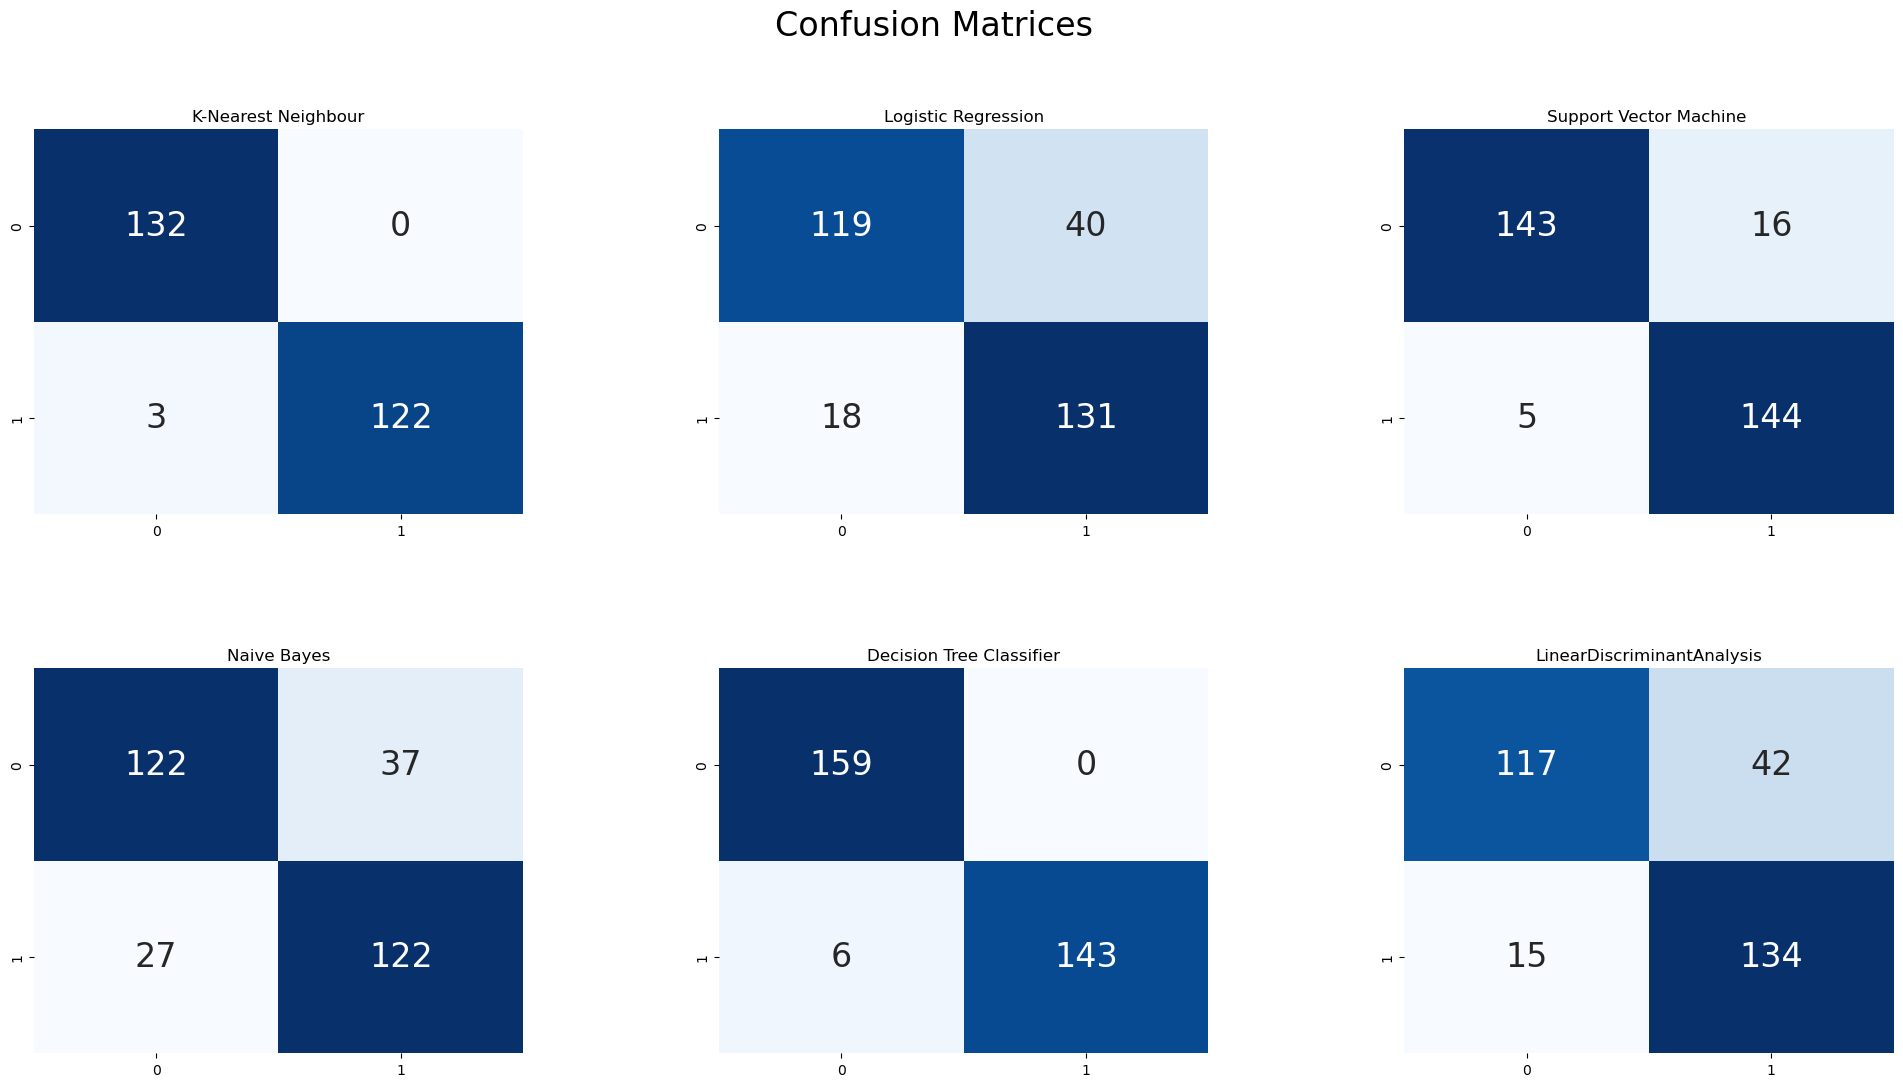

In [498]:
y_knn_head=knn_clf1.predict(X1_test)
y_logistic_head = model_logistic1.predict(X_test_scaled)
y_svm_head = svm1.predict(X_test_scaled)
y_nb_head=nb_best1.predict(X_test_scaled)
y_dtc_head=dtc_best1.predict(X_test_scaled)
y_LDA_head = lda1.predict(X_test_scaled)


cm_knn = confusion_matrix(y1_test, y_knn_head)
cm_logistic = confusion_matrix(y_test, y_logistic_head)
cm_svm = confusion_matrix(y_test, y_svm_head)
cm_nb = confusion_matrix(y_test, y_nb_head)
cm_dtc = confusion_matrix(y_test, y_dtc_head)
cm_LDA = confusion_matrix(y_test, y_LDA_head)

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K-Nearest Neighbour")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression")
sns.heatmap(cm_logistic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine ")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("LinearDiscriminantAnalysis")
sns.heatmap(cm_LDA,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Исходя из данной матрицы, можем увидеть, что наилучшие результаты дает модель Support Vector Machine, Decision Tree Classifier и метод k- ближайших соседей.  Однако количество ложно отрицательных для  метода k- ближайших соседей все же меньше. Support Vector Machine в том числе показывает сравнительно неплохи результаты. Самое худшее качество показывают модели Naive Bayes и LinearDiscriminantAnalysis. 

Для анализа я планирую взять таблицу, с которой я работал ранее, по ней я обучал модель регрессии для получения стоимости автомобиля, теперь я собираюсь получать данные о наличии аварий у автомобиля по выборке, где 0- аварий не было, 1- были аварии

In [ ]:


df2=pd.read_csv(r'C:\Users\yaneg\.git\py\ml\car_price_w.csv')
df2
y2=df2['accident']
X2=df2.drop(columns=['accident'])
X2_train,X2_test,y2_train,y2_test=train_test_split(X2, y2, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X2_train_scaled = scaler.fit_transform(X2_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X2_test_scaled = scaler.transform(X2_test)

In [ ]:
X2_train

,milage,transmission,brand_cat,age,fuel_cat,ext_col_cat,int_col_cat,hp,price
226,41000.0,3,2,6,0,3,1,563.000000,108900.0
2819,116000.0,2,1,11,0,2,1,173.000000,12500.0
535,25025.0,2,3,16,0,1,1,380.000000,39000.0
3193,94100.0,2,2,7,1,1,2,518.000000,49900.0
3224,13856.0,2,1,2,1,1,1,480.000000,54000.0
...,...,...,...,...,...,...,...,...,...
1130,110000.0,2,1,18,0,3,1,275.000000,5000.0
1294,120000.0,2,1,29,0,1,2,303.309641,6500.0
860,131193.0,2,1,8,0,1,1,221.760000,11970.0
3507,48619.0,2,1,6,0,3,1,400.000000,51499.0


In [499]:
#KNN
scoreList = []
i_values=[]
for i in range(1, 20, 1):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X2_train_scaled, y2_train)
    scoreList.append(knn2.score(X2_test_scaled, y2_test))
    i_values.append(i)
max_score = max(scoreList)
max_index = scoreList.index(max_score)  # Индекс максимального значения
best_i = 1+i_values[max_index]      
knn2 = KNeighborsClassifier(n_neighbors = best_i)  
knn2.fit(X2_train_scaled, y2_train)
prediction = knn2.predict(X2_test_scaled)
accuracy_knn = accuracy_score(y2_test, prediction)

accuracy_knn

0.742310889443059

In [500]:
#LR
param_grid = {'C': np.arange(1e-05, 5, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(max_iter=10000), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

gs.fit(X2_train_scaled, y2_train)
results = gs.cv_results_
best_C=gs.best_estimator_.C
best_C
model_logistic2 = LogisticRegression(max_iter=10000,C=best_C)
model_logistic2.fit(X2_train_scaled,y2_train)
y2_pred = model_logistic2.predict(X2_test_scaled)
accuracy_logistic = accuracy_score(y2_test, y2_pred)
accuracy_logistic

0.7489609310058188

In [508]:
# SVM
C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(10)
svm = SVC(random_state=11)
grid_svm = GridSearchCV(estimator=svm, cv=cv, 
        param_grid=dict(kernel=kernel,C=C, gamma=gamma))
grid_svm.fit(X2_train_scaled, y2_train)
best_C_SVM=grid_svm.best_estimator_.C
best_kernel_SVM=grid_svm.best_estimator_.kernel
best_gamma_SVM=grid_svm.best_estimator_.gamma
svm2 = SVC(random_state = 12,C=best_C_SVM,kernel=best_kernel_SVM,gamma=best_gamma_SVM)
svm2.fit(X2_train_scaled, y2_train)
prediction = svm2.predict(X2_test_scaled)
accuracy_svm = accuracy_score(y2_test, prediction)

acc = svm2.score(X2_test_scaled, y2_test)
accuracy_svm

0.7464671654197839

In [501]:
# NAIVE BAYES
# найдем лучшие параметры
priors=[[0.1,0.9],[0.2,0.8],[0.3, 0.7],[0.4,0.6],[0.5,0.5],[0.6,0.4],[0.7,0.3],[0.8,0.2],[0.9,0.1]]
var_smoothing=(1e-9,1e-8)
cv = StratifiedKFold(10)
nb = GaussianNB()
grid_nb = GridSearchCV(estimator=nb, cv=cv, 
        param_grid=dict(priors=priors,var_smoothing=var_smoothing))
grid_nb.fit(X2_train_scaled,y2_train)
best_p_nb=grid_nb.best_estimator_.priors
best_vs_nb=grid_nb.best_estimator_.var_smoothing
nb_best2 = GaussianNB(priors=best_p_nb,var_smoothing=best_vs_nb)
nb_best2.fit(X2_train_scaled, y2_train)
prediction=nb_best2.predict(X2_test_scaled)
accuracy_bayes= accuracy_score(y2_test,prediction)

accuracy_bayes

0.6982543640897756

In [502]:
#DECISION TREE

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 10, 20]
min_samples_split = [2, 4, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
max_features = [2, 4, 6, 8]
cv = StratifiedKFold(10)
dtc = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(estimator=dtc, cv=cv, 
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features))
grid_dt.fit(X_train_scaled, y_train)
best_crit_DTC=grid_dt.best_estimator_.criterion
best_split_DTC=grid_dt.best_estimator_.splitter
best_md_DTC=grid_dt.best_estimator_.max_depth
best_mss_DTC=grid_dt.best_estimator_.min_samples_split
best_msl_DTC=grid_dt.best_estimator_.min_samples_leaf
best_mf_DTC=grid_dt.best_estimator_.max_features

dtc_best2=DecisionTreeClassifier(random_state=42,criterion=best_crit_DTC,splitter=best_split_DTC,max_depth=best_md_DTC,min_samples_leaf=best_msl_DTC,min_samples_split=best_mss_DTC,max_features=best_mf_DTC)
dtc_best2.fit(X2_train_scaled,y2_train)
prediction=dtc_best2.predict(X2_test_scaled)
accuracy_tree= accuracy_score(y2_test,prediction)
accuracy_tree


0.6691604322527016

In [506]:
#LDA
solver=['svd','lsqr','eigen']
priors=[[0.5,0.5]]
cv = StratifiedKFold(10)

lda = LinearDiscriminantAnalysis()
grid_lda = GridSearchCV(estimator=lda, cv=cv, 
        param_grid=dict(solver=solver,priors=priors))

grid_lda.fit(X2_train_scaled,y2_train)
best_s_lda=grid_lda.best_estimator_.solver
best_p_lda=grid_lda.best_estimator_.priors

lda2 = LinearDiscriminantAnalysis(solver=best_s_lda,priors=best_p_lda)
lda2.fit(X2_train_scaled, y2_train)
prediction=lda2.predict(X2_test_scaled)
accuracy_lda= accuracy_score(y2_test,prediction)

accuracy_lda

0.6483790523690773

c:\Users\yaneg\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


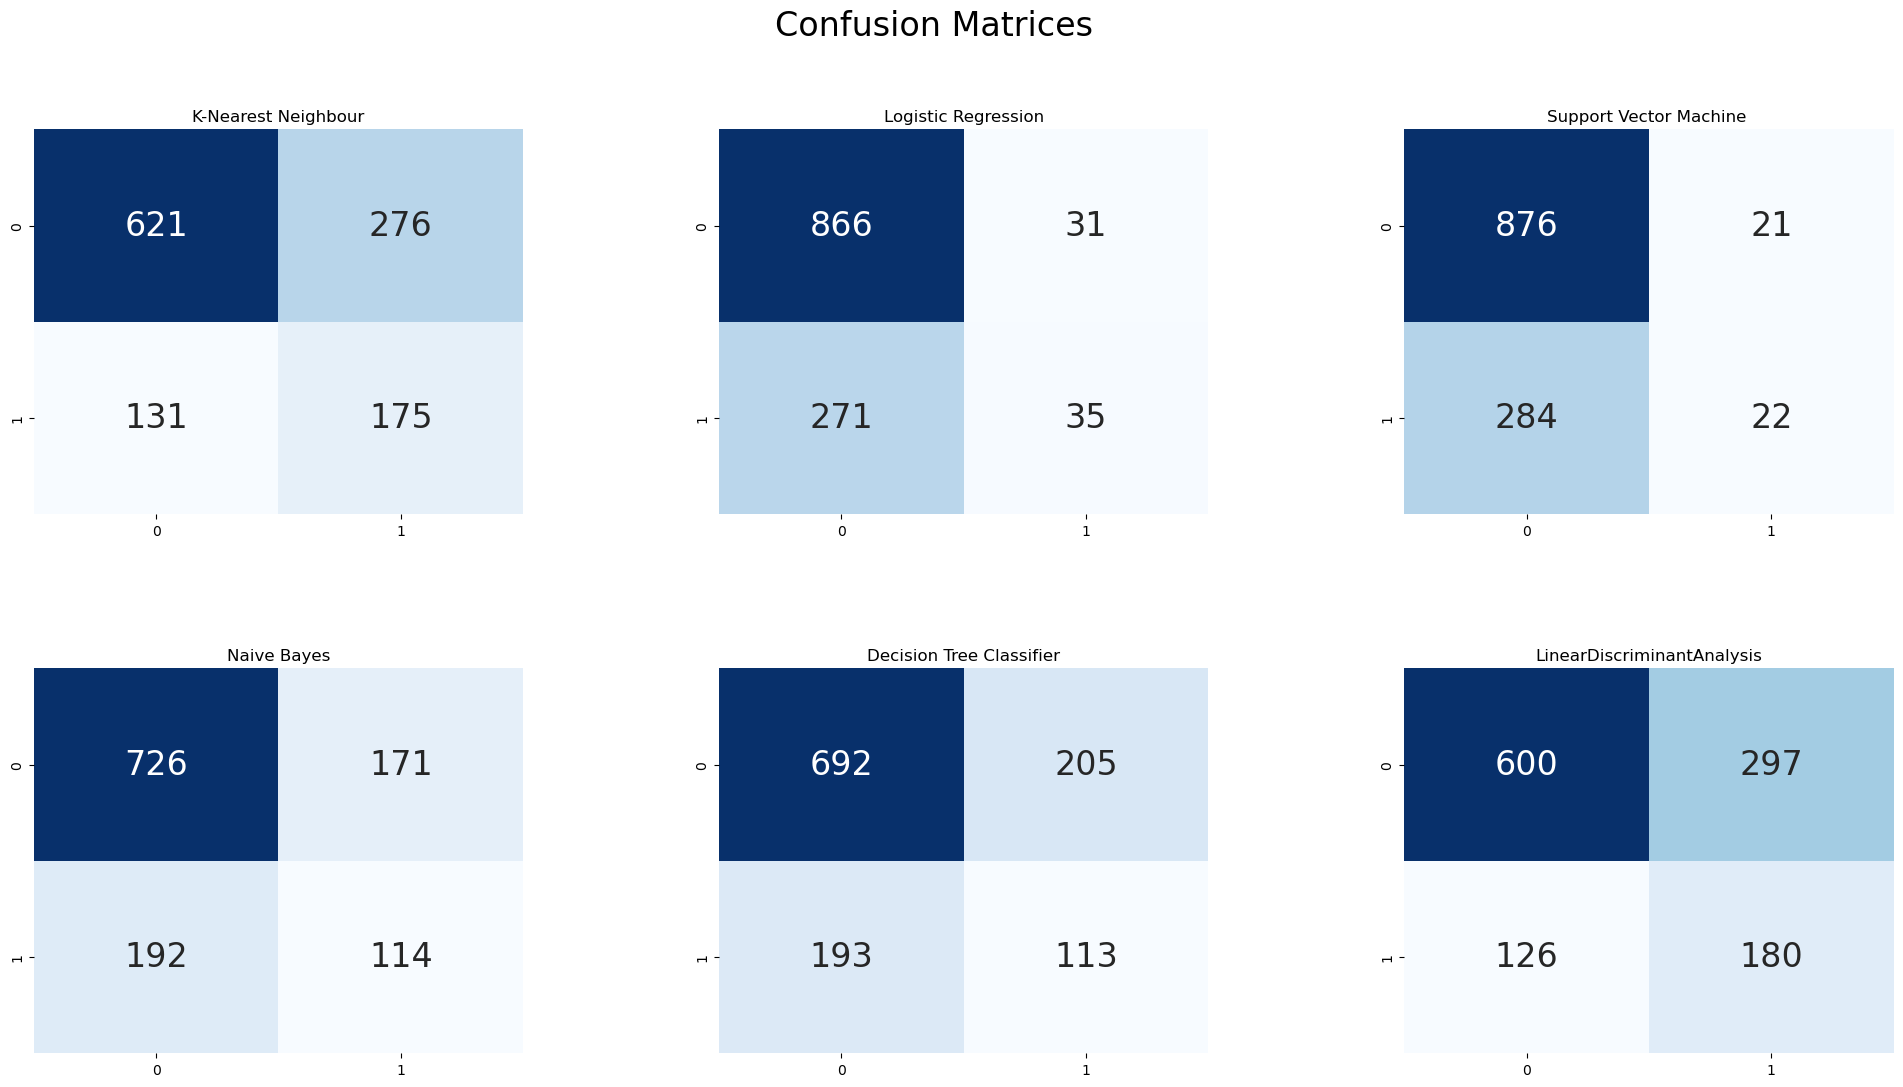

In [509]:
y_knn_head=knn2.predict(X2_test)
y_logistic_head = model_logistic2.predict(X2_test_scaled)
y_svm_head = svm2.predict(X2_test_scaled)
y_nb_head=nb_best2.predict(X2_test_scaled)
y_dtc_head=dtc_best2.predict(X2_test_scaled)
y_LDA_head = lda2.predict(X2_test_scaled)


cm_knn = confusion_matrix(y2_test, y_knn_head)
cm_logistic = confusion_matrix(y2_test, y_logistic_head)
cm_svm = confusion_matrix(y2_test, y_svm_head)
cm_nb = confusion_matrix(y2_test, y_nb_head)
cm_dtc = confusion_matrix(y2_test, y_dtc_head)
cm_LDA = confusion_matrix(y2_test, y_LDA_head)

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K-Nearest Neighbour")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression")
sns.heatmap(cm_logistic,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine ")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("LinearDiscriminantAnalysis")
sns.heatmap(cm_LDA,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

В данном случае мы можем увидеть, что лучшие результаты true positive даю модели Логистической регрессии и Support Vector Machine, одннако они обладают и худшими показателями false negative. Самым худшим качеством true_postive обладает метод linear discriminant anlysis, при этом у него меньше всего false negative. Наиболее взвешенной получилась матрица k-ближайших соседей, более того общее количество ошибок у нее наименьшее. Скорее свего в данном случае стоит выбрать данную модель.

Также хочется сказать о том, что результаты CONFUSION MATRIX по наборам данных получились совершенно разные, что говорит о необходимости применения всех моделей, и выбора лучшей из них, поскольку их качество может варироваться от набора к набору.